In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
orders = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/orders.csv')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [4]:
order_product_prior = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/order_products__prior.csv')
order_product_prior = order_product_prior[0:300000]

In [5]:
order_product_train = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/order_products__train.csv')
order_product_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
products = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [7]:
departments = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/departments.csv')
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
aisles = pd.read_csv('/Users/hayoung/Downloads/instacart-market-basket-analysis 2/aisles.csv')
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [9]:
process = pd.merge(orders,order_product_prior, on= 'order_id')

In [10]:
process2 = pd.merge(process, products, on='product_id')

In [11]:
process3 = pd.merge(process2, departments, on='department_id')

In [12]:
df = pd.merge(process3, aisles, on='aisle_id')

In [13]:
df.to_csv('instacart_data_')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                300000 non-null  int64  
 1   user_id                 300000 non-null  int64  
 2   eval_set                300000 non-null  object 
 3   order_number            300000 non-null  int64  
 4   order_dow               300000 non-null  int64  
 5   order_hour_of_day       300000 non-null  int64  
 6   days_since_prior_order  280806 non-null  float64
 7   product_id              300000 non-null  int64  
 8   add_to_cart_order       300000 non-null  int64  
 9   reordered               300000 non-null  int64  
 10  product_name            300000 non-null  object 
 11  aisle_id                300000 non-null  int64  
 12  department_id           300000 non-null  int64  
 13  department              300000 non-null  object 
 14  aisle               

In [15]:
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,23391,7,prior,17,0,10,28.0,13198,1,1,85% Lean Ground Beef,122,12,meat seafood,meat counter
1,5932,5030,prior,10,2,11,6.0,13198,6,1,85% Lean Ground Beef,122,12,meat seafood,meat counter
2,4339,6409,prior,23,0,7,8.0,13198,26,0,85% Lean Ground Beef,122,12,meat seafood,meat counter
3,10929,6462,prior,4,0,15,30.0,13198,5,0,85% Lean Ground Beef,122,12,meat seafood,meat counter
4,15486,8516,prior,3,0,10,3.0,13198,9,0,85% Lean Ground Beef,122,12,meat seafood,meat counter


In [16]:
df['product_id'].nunique(), df['product_name'].nunique()

(24836, 24836)

In [17]:
df['department'].unique()

array(['meat seafood', 'snacks', 'produce', 'beverages', 'dairy eggs',
       'deli', 'bakery', 'dry goods pasta', 'pantry', 'canned goods',
       'household', 'personal care', 'alcohol', 'frozen', 'other',
       'breakfast', 'babies', 'international', 'pets', 'bulk', 'missing'],
      dtype=object)

In [18]:
df['aisle'].unique()

array(['meat counter', 'hot dogs bacon sausage', 'packaged poultry',
       'packaged meat', 'poultry counter', 'seafood counter',
       'packaged seafood', 'fruit vegetable snacks', 'popcorn jerky',
       'candy chocolate', 'chips pretzels', 'energy granola bars',
       'crackers', 'cookies cakes', 'nuts seeds dried fruit',
       'trail mix snack mix', 'mint gum', 'ice cream toppings',
       'fresh fruits', 'packaged vegetables fruits', 'fresh vegetables',
       'fresh herbs', 'packaged produce', 'coffee',
       'water seltzer sparkling water', 'energy sports drinks',
       'soft drinks', 'refrigerated', 'juice nectars', 'tea',
       'cocoa drink mixes', 'soy lactosefree', 'eggs', 'cream', 'yogurt',
       'packaged cheese', 'butter', 'specialty cheeses', 'milk',
       'other creams cheeses', 'refrigerated pudding desserts',
       'lunch meat', 'fresh dips tapenades', 'prepared soups salads',
       'prepared meals', 'tofu meat alternatives', 'tortillas flat bread',
       

In [19]:
df['order_id'].nunique(), len(df)

(29724, 300000)

In [20]:
df['reordered'].unique()

array([1, 0])

In [21]:
df[df['user_id'] == 7].count()

order_id                  11
user_id                   11
eval_set                  11
order_number              11
order_dow                 11
order_hour_of_day         11
days_since_prior_order    11
product_id                11
add_to_cart_order         11
reordered                 11
product_name              11
aisle_id                  11
department_id             11
department                11
aisle                     11
dtype: int64

a

In [22]:
df[df['order_id'].duplicated()]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
280,19780,12906,prior,19,6,9,5.0,10603,1,1,93% Ground Beef,122,12,meat seafood,meat counter
308,6358,73705,prior,5,3,8,3.0,10603,3,1,93% Ground Beef,122,12,meat seafood,meat counter
333,15056,139103,prior,16,2,14,11.0,10603,19,1,93% Ground Beef,122,12,meat seafood,meat counter
416,30713,141190,prior,32,0,11,5.0,26324,12,0,Grass Fed Ground Beef,122,12,meat seafood,meat counter
443,28335,108588,prior,20,0,20,30.0,26842,11,1,Boneless Beef Sirloin Steak,122,12,meat seafood,meat counter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,28203,198677,prior,14,2,13,14.0,38474,9,0,Butter Snaps Bonus Bag,100,21,missing,missing
299996,26654,199780,prior,52,1,20,23.0,33080,10,1,Fresh Organic Carrots,100,21,missing,missing
299997,11023,200556,prior,21,4,9,8.0,45935,9,0,Twizted Strawberry Blasst Candy,100,21,missing,missing
299998,9475,201330,prior,37,6,9,10.0,49575,8,0,Chocolate Vanilla Malt Custard,100,21,missing,missing


In [23]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'department', 'aisle'],
      dtype='object')

In [24]:
df['aisle'].unique()

array(['meat counter', 'hot dogs bacon sausage', 'packaged poultry',
       'packaged meat', 'poultry counter', 'seafood counter',
       'packaged seafood', 'fruit vegetable snacks', 'popcorn jerky',
       'candy chocolate', 'chips pretzels', 'energy granola bars',
       'crackers', 'cookies cakes', 'nuts seeds dried fruit',
       'trail mix snack mix', 'mint gum', 'ice cream toppings',
       'fresh fruits', 'packaged vegetables fruits', 'fresh vegetables',
       'fresh herbs', 'packaged produce', 'coffee',
       'water seltzer sparkling water', 'energy sports drinks',
       'soft drinks', 'refrigerated', 'juice nectars', 'tea',
       'cocoa drink mixes', 'soy lactosefree', 'eggs', 'cream', 'yogurt',
       'packaged cheese', 'butter', 'specialty cheeses', 'milk',
       'other creams cheeses', 'refrigerated pudding desserts',
       'lunch meat', 'fresh dips tapenades', 'prepared soups salads',
       'prepared meals', 'tofu meat alternatives', 'tortillas flat bread',
       

In [25]:
# number of users
df['user_id'].nunique()

25831

In [26]:
df[df['user_id'] == 7].sort_values(by='order_number')['days_since_prior_order']

0         28.0
6606      28.0
33500     28.0
34291     28.0
67255     28.0
68000     28.0
120441    28.0
120453    28.0
145304    28.0
151269    28.0
195674    28.0
Name: days_since_prior_order, dtype: float64

In [27]:
# average number of orders by user
len(df)/df['user_id'].nunique()

11.61395222794317

In [28]:
df['order_dow'].unique() # 0: Monday 6: Sunday

array([0, 2, 5, 1, 6, 4, 3])

In [29]:
df['order_hour_of_day'].unique()

array([10, 11,  7, 15, 17,  8,  9, 18, 13, 14, 16, 12,  0, 20, 19,  1, 21,
        6, 23, 22,  3,  4,  5,  2])

In [30]:
df.groupby('user_id')['order_id'].nunique().describe()

count    25831.000000
mean         1.150710
std          0.420731
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: order_id, dtype: float64

In [31]:
df.groupby('user_id')['product_id'].nunique().describe()

count    25831.000000
mean        11.260153
std          8.870754
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max        105.000000
Name: product_id, dtype: float64

In [32]:
df.groupby(['user_id'])['add_to_cart_order'].mean().describe()

count    25831.000000
mean         5.616159
std          3.758998
min          1.000000
25%          3.000000
50%          4.666667
75%          7.500000
max         36.000000
Name: add_to_cart_order, dtype: float64

In [33]:
df[df['days_since_prior_order'].isnull()]['order_number'].value_counts()

order_number
1    19194
Name: count, dtype: int64

In [34]:
df[df['days_since_prior_order'].notnull()].groupby(['user_id'])['days_since_prior_order'].mean().describe() 

count    24169.000000
mean        11.133747
std          8.925167
min          0.000000
25%          5.000000
50%          8.000000
75%         15.000000
max         30.000000
Name: days_since_prior_order, dtype: float64

In [35]:
df['order_dow'].value_counts()  

order_dow
0    56869
1    52321
2    40803
6    40635
5    38903
3    35943
4    34526
Name: count, dtype: int64

In [36]:
df['department'].unique()

array(['meat seafood', 'snacks', 'produce', 'beverages', 'dairy eggs',
       'deli', 'bakery', 'dry goods pasta', 'pantry', 'canned goods',
       'household', 'personal care', 'alcohol', 'frozen', 'other',
       'breakfast', 'babies', 'international', 'pets', 'bulk', 'missing'],
      dtype=object)

In [37]:
segment_origin = pd.crosstab(df['user_id'], df['aisle'])
segment_origin

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206201,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(segment_origin)
pca_ = pca.transform(segment_origin)

In [39]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
cumulative_explained_variance

array([0.24378993, 0.3395383 , 0.40072269, 0.43814055, 0.47104939,
       0.50106546])

In [40]:
pca_ = pd.DataFrame(pca_)


In [41]:
pca_

,0,1,2,3,4,5
0,-0.286251,1.005868,-1.030291,-0.899059,-0.587795,-0.998583
1,-1.972748,-0.487659,-0.120542,0.213065,0.045895,-0.181859
2,-1.168974,1.284089,3.228125,0.594044,-0.648826,-1.091799
3,-1.433967,1.250081,3.261985,1.237761,-0.353500,-0.346497
4,-2.070709,-0.422148,-0.101553,0.278134,0.005954,-0.097175
...,...,...,...,...,...,...
25826,3.983455,-5.582119,1.119304,0.914163,0.347212,0.930131
25827,-0.787167,-0.683629,0.366958,-1.123046,-0.214266,0.364274
25828,-1.963173,-0.340850,-0.086297,0.015465,0.039054,0.142091
25829,-0.184913,0.217391,0.515424,-0.001116,-0.244145,-0.383755


In [42]:
selected_pca_components = pca_.iloc[:, [4,1]]

In [43]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=4, random_state=44).fit(selected_pca_components)
centers = kmeans.cluster_centers_
c_preds = kmeans.predict(selected_pca_components)

centers

/Users/hayoung/Library/r-miniconda-arm64/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[-0.24881904,  2.0595965 ],
       [-0.04637078, -0.15502563],
       [ 5.55592158,  1.45663525],
       [-0.00791501, -2.40014458]])

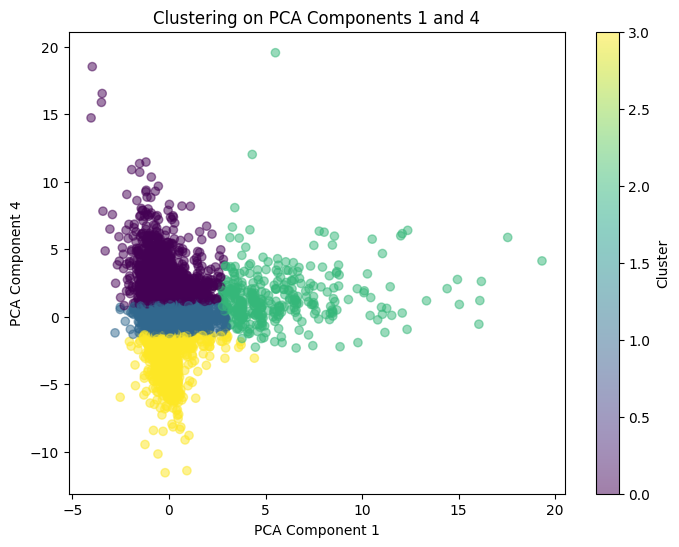

In [44]:
plt.figure(figsize=(8, 6))
plt.scatter(selected_pca_components.iloc[:, 0], selected_pca_components.iloc[:, 1], c=c_preds, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 4')
plt.title('Clustering on PCA Components 1 and 4')
plt.colorbar(label='Cluster')
plt.show()

In [45]:
segment_origin_2 = segment_origin.copy()
segment_origin_2['segment_clust'] = c_preds

segment_origin_2

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,segment_clust
user_id,,,,,,,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,4,0
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4,0
36,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
206201,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
206206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df[df['aisle']=='air fresheners candles']

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
257436,15744,1617,prior,9,1,9,4.0,29889,7,1,Palm Wax Votive Candles,101,17,household,air fresheners candles
257437,31413,2529,prior,7,0,22,3.0,41082,12,0,"PlugIns Scented Oil Refill, Clean Linen",101,17,household,air fresheners candles
257438,27217,34230,prior,9,4,7,17.0,41082,3,1,"PlugIns Scented Oil Refill, Clean Linen",101,17,household,air fresheners candles
257439,31413,2529,prior,7,0,22,3.0,23603,13,0,Plugins Scented Oil Warmer,101,17,household,air fresheners candles
257440,9840,193905,prior,40,3,19,3.0,23603,5,0,Plugins Scented Oil Warmer,101,17,household,air fresheners candles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257610,9840,193905,prior,40,3,19,3.0,10238,4,0,Deodorizing Aerosol Spray Apple Cinnamon,101,17,household,air fresheners candles
257611,9840,193905,prior,40,3,19,3.0,36152,6,0,Vanilla Passion Fruit & Hawaiian Breeze Scente...,101,17,household,air fresheners candles
257612,1057,196331,prior,37,0,16,1.0,23901,2,1,Pomegranate And Currant Soy Wax Candle,101,17,household,air fresheners candles
257613,8466,196355,prior,11,6,18,11.0,24335,6,1,Classic Clean Linen Candle,101,17,household,air fresheners candles


In [47]:
segment_origin_2['segment_clust'].value_counts()

segment_clust
1    18095
0     4484
3     2897
2      355
Name: count, dtype: int64

In [48]:
seg = segment_origin_2.reset_index()[['user_id', 'segment_clust']]

In [49]:
df = pd.merge(df, seg, how='inner', on='user_id')

In [50]:
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'department', 'aisle', 'segment_clust'],
      dtype='object')

In [51]:
c0 = segment_origin_2[segment_origin_2['segment_clust'] == 0].drop('segment_clust', axis=1).mean()
c1 = segment_origin_2[segment_origin_2['segment_clust'] == 1].drop('segment_clust', axis=1).mean()
c2 = segment_origin_2[segment_origin_2['segment_clust'] == 2].drop('segment_clust', axis=1).mean()
c3 = segment_origin_2[segment_origin_2['segment_clust'] == 3].drop('segment_clust', axis=1).mean()

In [52]:
segment_origin_2.drop('segment_clust', axis=1).mean().sort_values(ascending=False)

aisle
fresh fruits                  1.306763
fresh vegetables              1.200263
packaged vegetables fruits    0.631760
yogurt                        0.521737
packaged cheese               0.353567
                                ...   
eye ear care                  0.003136
kitchen supplies              0.003020
baby bath body care           0.002903
beauty                        0.002091
frozen juice                  0.001432
Length: 134, dtype: float64

In [53]:
print('Top 10 products in Cluster 0:')
print(c0.sort_values(ascending=False)[:10])

Top 10 products in Cluster 0:
aisle
fresh fruits                     3.268064
yogurt                           1.591882
packaged vegetables fruits       1.078724
fresh vegetables                 0.803524
packaged cheese                  0.603479
milk                             0.598127
chips pretzels                   0.481490
water seltzer sparkling water    0.452052
energy granola bars              0.432426
bread                            0.383363
dtype: float64


In [54]:
print('Top 10 products in Cluster 1:')
print(c1.sort_values(ascending=False)[:10])

Top 10 products in Cluster 1:
aisle
fresh fruits                     0.818348
fresh vegetables                 0.738933
packaged vegetables fruits       0.465267
yogurt                           0.277977
packaged cheese                  0.271125
water seltzer sparkling water    0.262780
milk                             0.249461
chips pretzels                   0.205803
soy lactosefree                  0.185742
refrigerated                     0.164742
dtype: float64


In [55]:
print('Top 10 products in Cluster 2:')
print(c2.sort_values(ascending=False)[:10])

Top 10 products in Cluster 2:
aisle
baby food formula                6.214085
fresh fruits                     2.605634
fresh vegetables                 1.814085
yogurt                           1.343662
packaged vegetables fruits       1.101408
packaged cheese                  0.828169
milk                             0.695775
chips pretzels                   0.430986
soy lactosefree                  0.419718
water seltzer sparkling water    0.419718
dtype: float64


In [56]:
print('Top 10 products in Cluster 3:')
print(c3.sort_values(ascending=False)[:10])

Top 10 products in Cluster 3:
aisle
fresh vegetables              4.620642
fresh fruits                  1.162582
packaged vegetables fruits    0.922333
packaged cheese               0.423542
fresh herbs                   0.421816
soy lactosefree               0.288574
yogurt                        0.287194
frozen produce                0.282361
milk                          0.279945
canned jarred vegetables      0.261650
dtype: float64


In [57]:
# Create 'weekday' column based on 'order_dow'
conditions_weekday = [
    (df['order_dow'] >= 0) & (df['order_dow'] <= 3),
    (df['order_dow'] > 3) & (df['order_dow'] <= 6)
]
choices_weekday = ['weekday', 'weekend']
df['weekday'] = np.select(conditions_weekday, choices_weekday, default='unknown')

# Create 'time' column based on 'order_hour_of_day'
conditions_time = [
    (df['order_hour_of_day'] >= 0) & (df['order_hour_of_day'] < 6),
    (df['order_hour_of_day'] >= 6) & (df['order_hour_of_day'] < 12),
    (df['order_hour_of_day'] >= 12) & (df['order_hour_of_day'] < 18),
    (df['order_hour_of_day'] >= 18) & (df['order_hour_of_day'] < 24)
]
choices_time = ['midnight', 'morning', 'afternoon', 'evening']
df['time'] = np.select(conditions_time, choices_time, default='unknown')

df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,segment_clust,weekday,time
0,23391,7,prior,17,0,10,28.0,13198,1,1,85% Lean Ground Beef,122,12,meat seafood,meat counter,0,weekday,morning
1,23391,7,prior,17,0,10,28.0,42803,2,1,Organic Apple Slices,50,19,snacks,fruit vegetable snacks,0,weekday,morning
2,23391,7,prior,17,0,10,28.0,8277,3,1,Apple Honeycrisp Organic,24,4,produce,fresh fruits,0,weekday,morning
3,23391,7,prior,17,0,10,28.0,32177,10,1,Blood Oranges,24,4,produce,fresh fruits,0,weekday,morning
4,23391,7,prior,17,0,10,28.0,4920,6,1,Seedless Red Grapes,123,4,produce,packaged vegetables fruits,0,weekday,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,10586,189560,prior,12,1,14,3.0,23850,1,1,Meaty Ground Dinner With Chopped Beef Wet Dog ...,40,8,pets,dog food care,1,weekday,afternoon
299996,9129,95897,prior,10,5,21,17.0,5161,1,0,Dried Mango,18,10,bulk,bulk dried fruits vegetables,1,weekend,evening
299997,30494,151064,prior,54,3,15,2.0,5161,1,1,Dried Mango,18,10,bulk,bulk dried fruits vegetables,1,weekday,afternoon
299998,31522,31188,prior,3,3,11,4.0,48778,1,1,"Fit Super A Juice, Cold Pressed, Carrot/Apple/...",18,10,bulk,bulk dried fruits vegetables,1,weekday,morning


In [58]:
df['weekday'].value_counts()

weekday
weekday    185936
weekend    114064
Name: count, dtype: int64

In [59]:
df['time'].value_counts()

time
afternoon    141365
morning      100122
evening       53037
midnight       5476
Name: count, dtype: int64

In [60]:
df.to_csv('instacart_processed_.csv')

In [61]:
df = pd.read_csv('instacart_processed_.csv')

### Get the co-frequencies between aisles within same order_ids

In [62]:
import pandas as pd
from itertools import combinations

df = pd.read_csv('instacart_processed_.csv')

order_user_pairs = df.groupby(['order_id', 'user_id'])['aisle'].apply(lambda x: list(combinations(x, 2))).reset_index(name='aisle_pairs')

pair_rows = order_user_pairs.explode('aisle_pairs').dropna()

pair_rows = pair_rows.merge(df[['user_id', 'segment_clust']].drop_duplicates(), on='user_id', how='left')

pair_counts = pair_rows.groupby(['aisle_pairs', 'segment_clust']).size().reset_index(name='Frequency')

In [63]:
pair_counts

,aisle_pairs,segment_clust,Frequency
0,"(air fresheners candles, air fresheners candles)",0,24
1,"(air fresheners candles, air fresheners candles)",1,21
2,"(air fresheners candles, asian foods)",1,9
3,"(air fresheners candles, baby accessories)",1,2
4,"(air fresheners candles, baby food formula)",0,10
...,...,...,...
27789,"(yogurt, white wines)",3,2
27790,"(yogurt, yogurt)",0,9032
27791,"(yogurt, yogurt)",1,1757
27792,"(yogurt, yogurt)",2,425


In [64]:
pair_counts.to_csv('aisle_pair_counts_.csv', index=False)